In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
sns.__version__

'0.11.1'

## Plot Distance Matrix B11-SIINFEKL

In [3]:
distance_matrix = pd.read_csv('../results/model3d/test.csv', index_col=0)
distance_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,29.556695,26.230717,25.294366,21.316174,20.204791,17.215092,16.115211,12.783735,12.248372,18.434743,21.052327,22.424093,26.023275,27.887189
1,27.541312,24.232707,22.964543,18.834960,17.419840,14.285291,13.683831,10.757084,11.554767,16.614973,19.777104,21.072364,24.324952,26.611124
2,24.870878,21.432605,19.761143,15.515296,13.695091,10.724622,9.715078,7.374296,8.452361,13.008653,16.343737,18.023497,20.806092,23.718679
3,21.326890,17.978846,16.743533,12.682276,11.708579,8.540606,8.495547,4.997584,7.149326,10.797263,13.993160,14.960388,18.286500,20.446048
4,23.060095,19.816649,17.917185,13.739056,11.791004,8.761336,9.087573,7.748392,10.558692,12.652901,16.360389,17.586080,19.949544,22.988298
5,20.083626,16.784046,14.374117,10.185529,7.641449,5.030665,5.459770,6.113956,9.369180,9.262325,13.062380,14.550457,16.154536,19.873098
6,17.258006,14.495676,12.144744,8.788722,7.201237,5.664446,8.519620,9.545393,13.365308,10.689855,14.075683,14.393828,15.536565,18.693740
7,21.473243,18.954299,16.176703,13.177511,10.752053,9.940194,11.713919,13.572794,17.022723,14.675299,18.082092,18.942289,19.163179,23.092939


[Text(0.5, 53.62571428571427, 'CDR3β'), Text(90.5, 0.5, 'Epitope')]

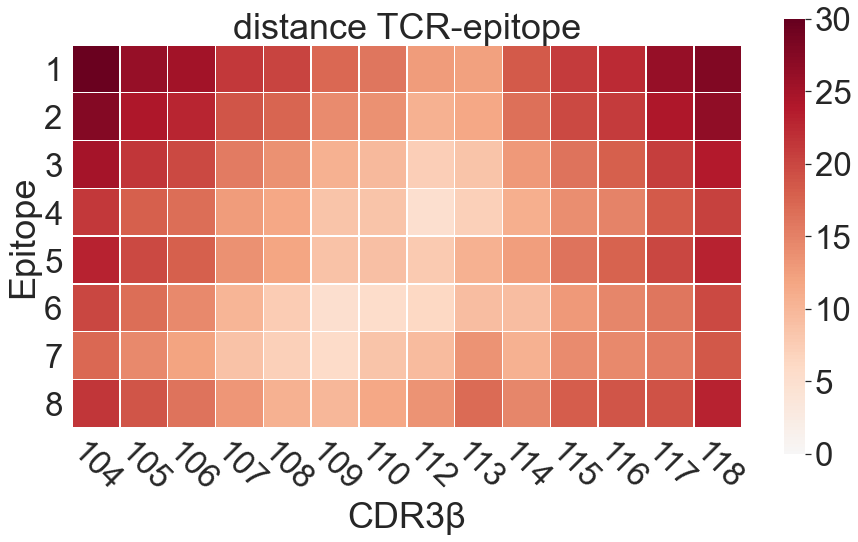

In [4]:
plt.figure(figsize=(15, 8))
x_ticks = list(range(104, 119))
x_ticks.remove(111)
y_ticks = list(range(1, 9))

sns.set(font_scale=3)
ax = sns.heatmap(distance_matrix, center=0, linewidths=0.5, cmap='RdBu_r', square=True, xticklabels=x_ticks, vmax=30, vmin=0, annot=False, fmt=".1f")
ax.set_xticklabels(x_ticks, rotation=-45)
ax.set_yticklabels(y_ticks, rotation=0)

ax.set_title('distance TCR-epitope')

ax.set(xlabel='CDR3β', ylabel='Epitope')

In [5]:
distance_matrix2 = pd.read_csv('../results/model3d/test_alpha.csv', index_col=0)
distance_matrix2

,0,1,2,3,4,5,6,7,8,9,10
0,22.848818,19.895847,16.864712,13.694238,11.750708,10.266579,12.600564,17.207277,18.744813,19.532790,23.527154
1,24.010382,20.705858,17.796961,13.943008,12.284230,9.834561,11.126800,16.442166,18.411575,19.972227,23.691378
2,22.417335,18.956991,16.543704,12.453151,12.028041,9.683873,9.145007,15.293279,16.498202,18.937794,21.938734
3,20.756172,17.178477,14.885658,10.605563,10.531778,8.001234,6.336559,12.584866,13.960474,16.764051,19.528323
4,24.371757,20.764381,18.538209,14.233470,13.920856,11.048667,9.413733,15.266222,17.080340,20.036488,22.682607
5,22.098907,18.512568,17.107420,13.056897,14.217668,11.990365,8.279524,13.854025,14.553130,18.459319,19.947964
6,25.321418,21.798750,20.398307,16.472236,17.164434,14.651365,11.250702,15.430977,16.990067,20.785429,22.130423
7,29.567177,26.048083,24.785724,20.807432,21.554471,18.937113,15.659028,20.162266,21.480737,25.427160,26.567239


[Text(0.5, 27.5, 'CDR3α'), Text(162.14000000000016, 0.5, 'Epitope')]

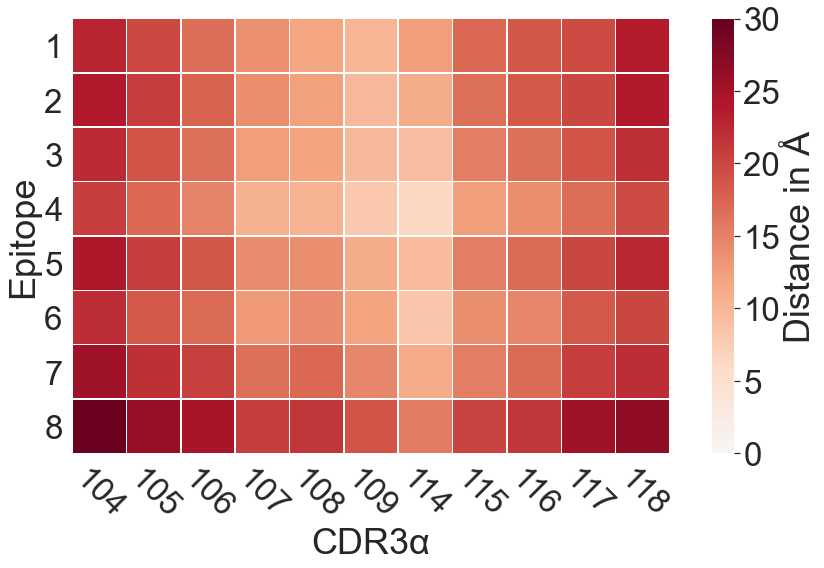

In [6]:
plt.figure(figsize=(15, 8))
x_ticks = list(range(104, 119))
x_ticks.remove(110)
x_ticks.remove(111)
x_ticks.remove(112)
x_ticks.remove(113)
y_ticks = list(range(1, 9))

sns.set(font_scale=3)
ax = sns.heatmap(distance_matrix2, center=0, linewidths=0.5, cmap='RdBu_r', square=True, xticklabels=x_ticks, vmax=30, vmin=0, annot=False, fmt=".1f", cbar_kws={'label': 'Distance in Å'})
ax.set_xticklabels(x_ticks, rotation=-45)
ax.set_yticklabels(y_ticks, rotation=0)

ax.set(xlabel='CDR3α', ylabel='Epitope')

## Plot TCR umap

In [33]:
import DimRed as dr

In [34]:
sns.set(font_scale=1.5)
sns.set_style('white')

In [37]:
data_naive = distance_matrix = pd.read_csv('../data/activations_lena.csv', index_col=0)
data_educated = distance_matrix = pd.read_csv('../data/activations_phillip.csv', index_col=0)
data_org =  pd.concat([data_naive, data_educated], axis=1, join='inner')

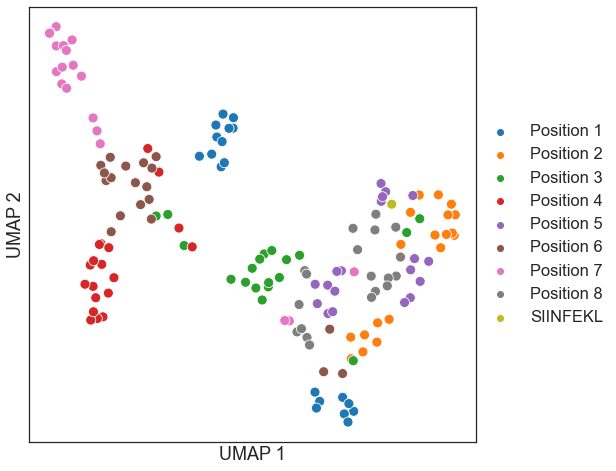

In [95]:
def plot_2d_data(data_reduced, colors=None):
    plt.figure(figsize=(8, 8))
    n_colors = 1
    palette = 'tab10'
    if colors is not None:
        n_colors = len(set(colors))
        if n_colors > 10:
            palette = 'Spectral'
    plot = sns.scatterplot(data=data_reduced, x='x', y='y', s=100, hue=colors, palette=sns.color_palette(palette, n_colors))
    plt.legend(bbox_to_anchor=(1.3, 0.5), loc='right', borderaxespad=0., frameon=False, ncol=1)
    plot.set(xlabel='UMAP 1', ylabel='UMAP 2')
    plot.set_yticks([])
    plot.set_xticks([])
    

    # plot.legend(frameon=False, loc='lower', ncol=3)
    # plt.legend([],[], frameon=False)
epitope_data_red = dr.umap_transform(data_org, neighbors=5, min_dist=0.5)
group_position = dr.create_positional_grouping(153)
group_aa = dr.create_positional_grouping(153)
plot_2d_data(epitope_data_red, colors=group_position)

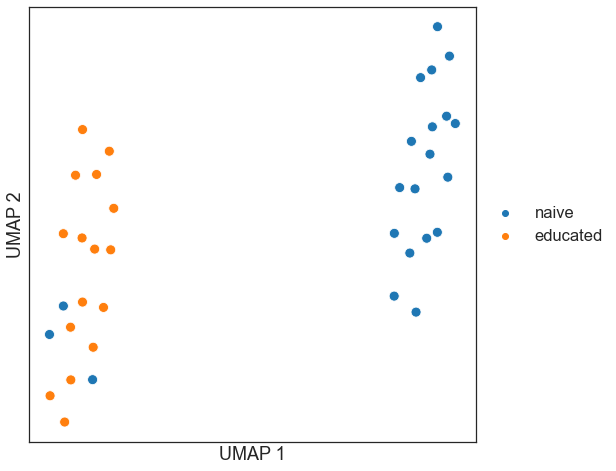

In [112]:
def plot_2d_data(data_reduced, colors=None):
    plt.figure(figsize=(8, 8))
    n_colors = 1
    palette = 'tab10'
    if colors is not None:
        n_colors = len(set(colors))
        if n_colors > 10:
            palette = 'Spectral'
    plot = sns.scatterplot(data=data_reduced, x='x', y='y', s=100, hue=colors, palette=sns.color_palette(palette, n_colors))
    plt.legend(bbox_to_anchor=(1.3, 0.5), loc='right', borderaxespad=0., frameon=False, ncol=1)
    plot.set(xlabel='UMAP 1', ylabel='UMAP 2')
    plot.set_yticks([])
    plot.set_xticks([])
    

    # plot.legend(frameon=False, loc='lower', ncol=3)
    # plt.legend([],[], frameon=False)
data_tcr = data_org.transpose()
epitope_data_red = dr.umap_transform(data_tcr, neighbors=15, min_dist=1.)
colors = ['naive'] * 21 + ['educated'] * 16 
plot_2d_data(epitope_data_red, colors=colors)

In [99]:
data_tcr

,AIINFEKL,CIINFEKL,DIINFEKL,EIINFEKL,FIINFEKL,GIINFEKL,HIINFEKL,IIINFEKL,KIINFEKL,LIINFEKL,...,SIINFEKN,SIINFEKP,SIINFEKQ,SIINFEKR,SIINFEKS,SIINFEKT,SIINFEKV,SIINFEKW,SIINFEKY,SIINFEKL
OT1,8.780000,4.600000,21.170000,2.870000,2.900000,13.350000,18.220000,1.310000,13.250000,0.880000,...,26.600000,30.560000,29.090000,30.610000,23.760000,31.320000,31.170000,27.010000,32.280000,36.290000
B11,12.000000,2.810000,9.850000,4.790000,0.430000,15.040000,9.000000,0.490000,5.880000,0.460000,...,20.600000,27.730000,30.190000,30.240000,20.650000,26.570000,25.420000,22.960000,28.980000,34.380000
B15,39.000000,26.570000,41.330000,34.940000,6.640000,30.780000,23.780000,5.290000,27.230000,20.990000,...,38.840000,34.530000,36.110000,41.630000,36.920000,44.980000,41.480000,37.070000,36.510000,46.040000
B3,2.970000,2.550000,2.870000,2.510000,2.820000,2.570000,2.740000,2.450000,3.000000,2.180000,...,5.540000,3.570000,2.940000,4.290000,3.160000,4.880000,5.480000,3.940000,4.170000,5.600000
F4,0.310000,0.290000,0.220000,0.330000,0.400000,2.160000,0.590000,0.200000,0.740000,0.300000,...,5.420000,5.530000,8.740000,3.180000,5.940000,7.070000,5.260000,5.660000,10.340000,11.520000
E8,3.750000,1.570000,4.230000,1.140000,1.630000,1.890000,1.490000,1.370000,1.110000,1.460000,...,1.800000,0.940000,1.850000,1.900000,0.850000,1.190000,1.150000,0.870000,3.060000,3.330000
B13,3.430000,0.260000,0.460000,0.460000,0.100000,0.970000,0.400000,1.570000,2.630000,0.460000,...,12.340000,9.400000,1.020000,8.150000,8.450000,1.360000,1.610000,1.740000,3.340000,4.110000
H6,3.120000,1.060000,8.590000,3.980000,1.550000,2.900000,2.500000,1.890000,2.150000,1.990000,...,2.430000,1.460000,0.730000,2.280000,0.720000,2.920000,3.010000,1.390000,4.090000,5.610000
G6,0.840000,0.650000,0.510000,0.310000,0.580000,0.300000,0.280000,1.180000,3.210000,3.920000,...,0.190000,0.270000,0.210000,0.800000,0.110000,0.460000,0.730000,2.490000,2.720000,1.300000
F5,0.720000,0.410000,0.400000,0.460000,0.360000,0.870000,0.470000,0.360000,0.450000,0.520000,...,0.290000,0.490000,0.400000,0.480000,1.920000,0.630000,0.720000,0.400000,1.030000,1.380000


## Legend 3D Plot

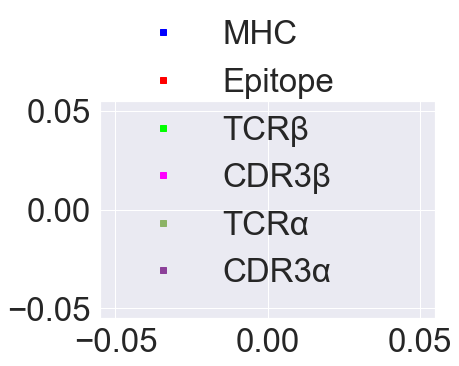

In [15]:
colors = ["Blue", "Red", "Green", "Magenta", "Green", "Magenta"]
colors = [
    (0.0, 0.0, 1.0),
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (1.0, 0.0, 1.0),
    (0.55, 0.70, 0.40),
    (0.55, 0.25, 0.60)
]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", color) for color in colors]
labels = ['MHC', 'Epitope', 'TCRβ', 'CDR3β', 'TCRα', 'CDR3α']
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=False)

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)
    
export_legend(legend)

## Heatmap

In [43]:
data_naive = distance_matrix = pd.read_csv('../data/activations_lena.csv', index_col=0)
data_naive = data_naive.drop(['OT1'], axis=1)
#data_naive = data_naive[['OT1', 'B11', 'B15']]
data_educated = distance_matrix = pd.read_csv('../data/activations_phillip.csv', index_col=0)
data_joint =  pd.concat([data_naive, data_educated], axis=1, join='inner')

order = list(data_joint.columns)
order.remove('OT1')
order = ['OT1'] + order
data_joint = data_joint[order]
data_joint

,OT1,B11,B15,B3,F4,E8,B13,H6,G6,F5,...,Ed33,Ed28,Ed39,Ed40,Ed8,Ed9,Ed1630,Ed23,Ed46,Ed45
AIINFEKL,15.517241,12.00,39.00,2.97,0.31,3.75,3.43,3.12,0.84,0.72,...,26.987179,50.579151,0.334158,46.141304,58.120650,49.944072,24.220321,39.123631,21.404494,1.254502
CIINFEKL,6.655172,2.81,26.57,2.55,0.29,1.57,0.26,1.06,0.65,0.41,...,17.243590,28.378378,2.840347,28.152174,46.635731,6.297539,7.127727,22.378717,1.820225,3.739496
DIINFEKL,36.264368,9.85,41.33,2.87,0.22,4.23,0.46,8.59,0.51,0.40,...,61.666667,25.804376,0.167079,40.815217,50.928074,5.357942,12.923797,22.769953,19.382023,6.776711
EIINFEKL,8.810345,4.79,34.94,2.51,0.33,1.14,0.46,3.98,0.31,0.46,...,59.871795,38.416988,0.179455,19.782609,58.236659,0.894855,2.053904,39.201878,5.005618,2.833133
FIINFEKL,3.988506,0.43,6.64,2.82,0.40,1.63,0.10,1.55,0.58,0.36,...,17.564103,46.460746,0.235149,35.000000,56.554524,10.508949,0.958636,6.400626,0.516854,0.972389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIINFEKT,45.057471,26.57,44.98,4.88,7.07,1.19,1.36,2.92,0.46,0.63,...,54.358974,40.026380,32.196385,40.489130,50.000000,46.756152,42.009893,31.611894,28.932584,27.430972
SIINFEKV,38.448276,25.42,41.48,5.48,5.26,1.15,1.61,3.01,0.73,0.72,...,47.692308,36.608889,27.051352,38.043478,39.791183,41.051454,38.541711,26.525822,25.449438,22.809124
SIINFEKW,40.287356,22.96,37.07,3.94,5.66,0.87,1.74,1.39,2.49,0.40,...,51.538461,32.966715,21.441926,36.032609,43.097448,43.008949,35.638770,28.951487,26.348315,27.070828
SIINFEKY,49.942529,28.98,36.51,4.17,10.34,3.06,3.34,4.09,2.72,1.03,...,59.038461,43.417992,37.992022,43.913044,52.726218,52.796421,43.227273,38.497653,30.617977,29.591837


In [5]:
sns.__version__

'0.11.1'

In [6]:
max(data_joint.max())

84.8148148

<Figure size 576x576 with 0 Axes>

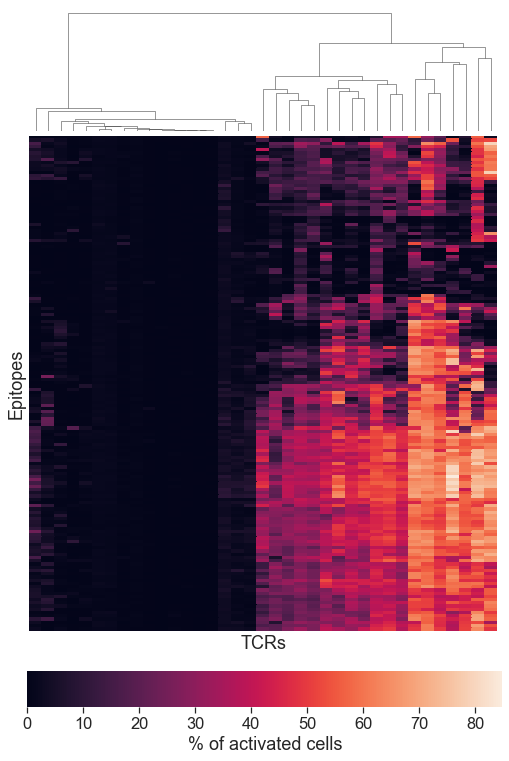

In [7]:
def plot_clustermap(data):
    sns.set(font_scale=1.5)
    sns.set_style('white')
    plt.figure(figsize=(8, 8))
    
    plot = sns.clustermap(data, cbar_kws={"orientation": "horizontal", 'label': '% of activated cells'}, cbar_pos=(0.19, 0, 0.66, .05)) #)
    # left bottom width height
    
    plot.ax_row_dendrogram.set_visible(False)
    
    ax = plot.ax_heatmap
    # ax = plot
    ax.set_yticks([])
    ax.set_xticks([])
    
    ax.set(xlabel='TCRs', ylabel='Epitopes')
    ax.yaxis.set_label_position("left")
plot_clustermap(data_joint)

In [8]:
data_joint

,OT1,B11,B15,B3,F4,E8,B13,H6,G6,F5,...,Ed28,Ed39,Ed40,Ed8,Ed9,Ed1630,OT1,Ed23,Ed46,Ed45
AIINFEKL,8.78,12.00,39.00,2.97,0.31,3.75,3.43,3.12,0.84,0.72,...,50.579151,0.334158,46.141304,58.120650,49.944072,24.220321,15.517241,39.123631,21.404494,1.254502
CIINFEKL,4.60,2.81,26.57,2.55,0.29,1.57,0.26,1.06,0.65,0.41,...,28.378378,2.840347,28.152174,46.635731,6.297539,7.127727,6.655172,22.378717,1.820225,3.739496
DIINFEKL,21.17,9.85,41.33,2.87,0.22,4.23,0.46,8.59,0.51,0.40,...,25.804376,0.167079,40.815217,50.928074,5.357942,12.923797,36.264368,22.769953,19.382023,6.776711
EIINFEKL,2.87,4.79,34.94,2.51,0.33,1.14,0.46,3.98,0.31,0.46,...,38.416988,0.179455,19.782609,58.236659,0.894855,2.053904,8.810345,39.201878,5.005618,2.833133
FIINFEKL,2.90,0.43,6.64,2.82,0.40,1.63,0.10,1.55,0.58,0.36,...,46.460746,0.235149,35.000000,56.554524,10.508949,0.958636,3.988506,6.400626,0.516854,0.972389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIINFEKT,31.32,26.57,44.98,4.88,7.07,1.19,1.36,2.92,0.46,0.63,...,40.026380,32.196385,40.489130,50.000000,46.756152,42.009893,45.057471,31.611894,28.932584,27.430972
SIINFEKV,31.17,25.42,41.48,5.48,5.26,1.15,1.61,3.01,0.73,0.72,...,36.608889,27.051352,38.043478,39.791183,41.051454,38.541711,38.448276,26.525822,25.449438,22.809124
SIINFEKW,27.01,22.96,37.07,3.94,5.66,0.87,1.74,1.39,2.49,0.40,...,32.966715,21.441926,36.032609,43.097448,43.008949,35.638770,40.287356,28.951487,26.348315,27.070828
SIINFEKY,32.28,28.98,36.51,4.17,10.34,3.06,3.34,4.09,2.72,1.03,...,43.417992,37.992022,43.913044,52.726218,52.796421,43.227273,49.942529,38.497653,30.617977,29.591837


In [35]:
for el in data_joint.columns:
    print(el)

OT1
B11
B15
B3
F4
E8
B13
H6
G6
F5
H5
B5
G2
B7
E4
B14
E9
B10
B16
B2
B6
Ed5
Ed31
Ed10
Ed161
Ed21
Ed33
Ed28
Ed39
Ed40
Ed8
Ed9
Ed1630
OT1
Ed23
Ed46
Ed45


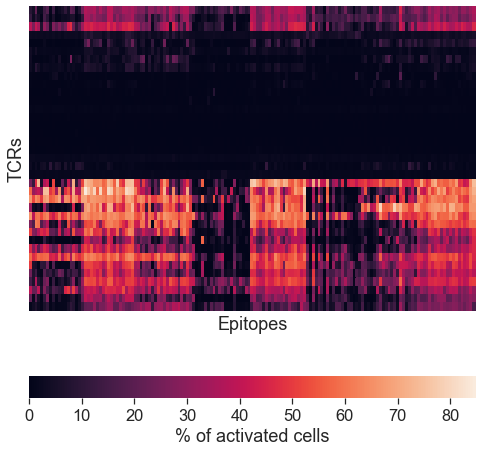

In [9]:
def plot_heatmap(data_tmp):
    data = data_tmp.transpose()
    sns.set(font_scale=1.5)
    sns.set_style('white')
    plt.figure(figsize=(8, 8))
   
    plot = sns.heatmap(data, cbar_kws={"orientation": "horizontal", 'label': '% of activated cells'} )#, cbar_pos=(0.19, 0, 0.66, .05)) #)
    # left bottom width height
  
    # ax = plot.ax_heatmap
    # ax = plot
    plot.set_yticks([])
    plot.set_xticks([])
    
    plot.set(xlabel='Epitopes', ylabel='TCRs')
    plot.yaxis.set_label_position("left")
plot_heatmap(data_joint)

36
36


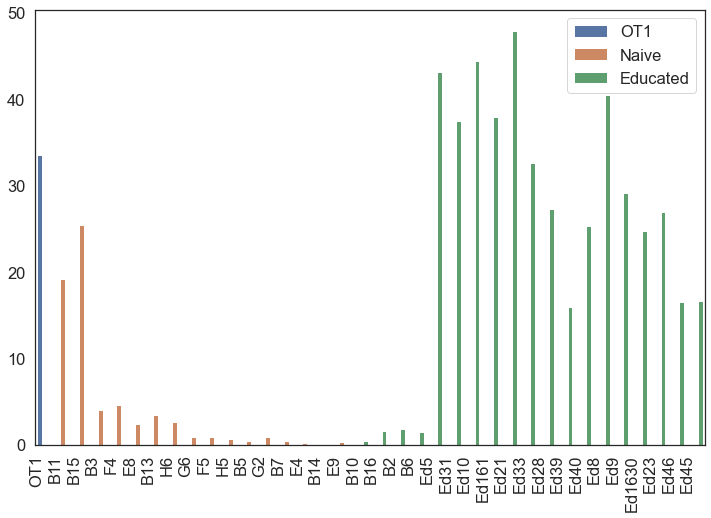

In [58]:
def plot_histplot(data_tmp, axis=0):
    if axis == 0:
        x = list(range(1, 154))
    else:
        x = data_tmp.columns
        color = ['OT1'] + ['Naive'] * 16 + ['Educated'] * 19
    data = data_tmp.transpose()
    data = data.values
    data = np.mean(data, axis=axis)
    sns.set(font_scale=1.5)
    sns.set_style('white')
    plt.figure(figsize=(12, 8))
    
    print(len(x))
    print(len(color))
    plot = sns.barplot(x=x, y=data, hue=color)
    
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
    
    # left bottom width height
  
    # ax = plot.ax_heatmap
    # ax = plot
    
#plot_histplot(data_joint)
plot_histplot(data_joint, axis=1)

In [45]:
print(len(data_naive.columns))
print(len(data_educated.columns))

20
16


In [13]:
data_joint

,OT1,B11,B15,B3,F4,E8,B13,H6,G6,F5,...,Ed28,Ed39,Ed40,Ed8,Ed9,Ed1630,OT1,Ed23,Ed46,Ed45
AIINFEKL,8.78,12.00,39.00,2.97,0.31,3.75,3.43,3.12,0.84,0.72,...,50.579151,0.334158,46.141304,58.120650,49.944072,24.220321,15.517241,39.123631,21.404494,1.254502
CIINFEKL,4.60,2.81,26.57,2.55,0.29,1.57,0.26,1.06,0.65,0.41,...,28.378378,2.840347,28.152174,46.635731,6.297539,7.127727,6.655172,22.378717,1.820225,3.739496
DIINFEKL,21.17,9.85,41.33,2.87,0.22,4.23,0.46,8.59,0.51,0.40,...,25.804376,0.167079,40.815217,50.928074,5.357942,12.923797,36.264368,22.769953,19.382023,6.776711
EIINFEKL,2.87,4.79,34.94,2.51,0.33,1.14,0.46,3.98,0.31,0.46,...,38.416988,0.179455,19.782609,58.236659,0.894855,2.053904,8.810345,39.201878,5.005618,2.833133
FIINFEKL,2.90,0.43,6.64,2.82,0.40,1.63,0.10,1.55,0.58,0.36,...,46.460746,0.235149,35.000000,56.554524,10.508949,0.958636,3.988506,6.400626,0.516854,0.972389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIINFEKT,31.32,26.57,44.98,4.88,7.07,1.19,1.36,2.92,0.46,0.63,...,40.026380,32.196385,40.489130,50.000000,46.756152,42.009893,45.057471,31.611894,28.932584,27.430972
SIINFEKV,31.17,25.42,41.48,5.48,5.26,1.15,1.61,3.01,0.73,0.72,...,36.608889,27.051352,38.043478,39.791183,41.051454,38.541711,38.448276,26.525822,25.449438,22.809124
SIINFEKW,27.01,22.96,37.07,3.94,5.66,0.87,1.74,1.39,2.49,0.40,...,32.966715,21.441926,36.032609,43.097448,43.008949,35.638770,40.287356,28.951487,26.348315,27.070828
SIINFEKY,32.28,28.98,36.51,4.17,10.34,3.06,3.34,4.09,2.72,1.03,...,43.417992,37.992022,43.913044,52.726218,52.796421,43.227273,49.942529,38.497653,30.617977,29.591837


## Atomic distances B11 - com

In [113]:
10.8, 10.8, 7.4, 4.0, 7.7, 5.0, 5.7, 9.9

(10.8, 10.8, 7.4, 4.0, 7.7, 5.0, 5.7, 9.9)

In [ ]:
10.5, 9.8, 9.9, 6.4, 10.4, 9.3, 10.4, 15.4

In [139]:
min_dist_b11 = [10.5, 9.8, 7.4, 4.0, 7.7, 5.0, 5.7, 9.9]
df_b11 = pd.DataFrame(min_dist_b11)
df_b11 = df_b11.transpose()
df_b11.columns = [str(x) for x in range(1, 9)]
df_b11

,1,2,3,4,5,6,7,8
0,10.5,9.8,7.4,4.0,7.7,5.0,5.7,9.9


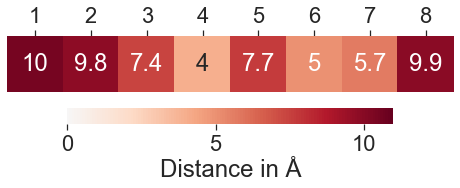

In [168]:
sns.set(font_scale=2)    
sns.set_style('white')
plt.figure(figsize=(8, 2))

plot = sns.heatmap(df_b11, annot=True, center=0, vmin=0., vmax=11, cmap='RdBu_r', cbar_kws={"orientation": "horizontal", 'label': 'Distance in Å'}, square=True)#, cbar_pos=(0.19, 0, 0.66, .05)) #)

plot.set_yticks([])
plot.xaxis.set_label_position('top')
plot.xaxis.tick_top()



atomic distances B14 - com

In [ ]:
14.5, 12.4, 9.2, 6.0, 8.4, 5.5, 6.0, 10.4

In [ ]:
7.3, 8.2, 8.3, 6.5, 10.5, 11.1, 10.3, 15.2

In [156]:
min_dist_b14 = [7.3, 8.2, 8.3, 6.0, 8.4, 5.5, 6.0, 10.4]
df_b14 = pd.DataFrame(min_dist_b14)
df_b14 = df_b14.transpose()
df_b14.columns = [str(x) for x in range(1, 9)]
df_b14

,1,2,3,4,5,6,7,8
0,7.3,8.2,8.3,6.0,8.4,5.5,6.0,10.4


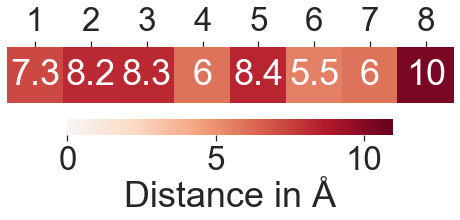

In [166]:
sns.set(font_scale=3)    
sns.set_style('white')
plt.figure(figsize=(8, 2))

plot = sns.heatmap(df_b14, annot=True, center=0, vmin=0., vmax=11, cmap='RdBu_r', cbar_kws={"orientation": "horizontal", 'label': 'Distance in Å'}, square=True)#, cbar_pos=(0.19, 0, 0.66, .05)) #)

plot.set_yticks([])
plot.xaxis.set_label_position('top')
plot.xaxis.tick_top()



atomic distances OT1 - com

In [ ]:
10.6, 10.2, 9.9, 6.1, 9.2, 7.1, 9.8, 14.3

In [ ]:
16.3, 14.8, 10.8, 8.9, 9.9, 4.9, 8.9, 11.0

In [2]:
min_dist_ot1 = [10.6, 10.2, 9.9, 6.1, 9.2, 4.9, 8.9, 11.0]
df_ot1 = pd.DataFrame(min_dist_ot1)
df_ot1 = df_ot1.transpose()
df_ot1.columns = [str(x) for x in range(1, 9)]
df_ot1

,1,2,3,4,5,6,7,8
0,10.6,10.2,9.9,6.1,9.2,4.9,8.9,11.0


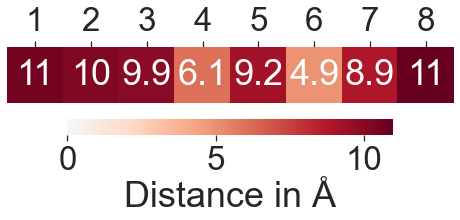

In [3]:
sns.set(font_scale=3)    
sns.set_style('white')
plt.figure(figsize=(8, 2))

plot = sns.heatmap(df_ot1, annot=True, center=0, vmin=0., vmax=11, cmap='RdBu_r', cbar_kws={"orientation": "horizontal", 'label': 'Distance in Å'}, square=True)#, cbar_pos=(0.19, 0, 0.66, .05)) #)

plot.set_yticks([])
plot.xaxis.set_label_position('top')
plot.xaxis.tick_top()

## Feature Importance - Paper

In [2]:
importances = {
    '1': [1-0.85],
    '2': [1-0.88],
    '3': [1-0.87],
    '4': [1-0.76],
    '5': [1-0.90],
    '6': [1-0.80],
    '7': [1-0.87],
    '8': [1-0.9]
}
importances = pd.DataFrame(importances)
importances

,1,2,3,4,5,6,7,8
0,0.15,0.12,0.13,0.24,0.1,0.2,0.13,0.1


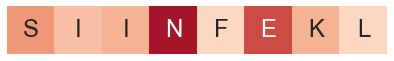

In [4]:
sns.set(font_scale=2)
plot = sns.heatmap(importances, annot=True, center=0.05, vmin=0.1, vmax=0.28, cmap='RdBu_r', cbar=False, square=True)
plot.set_yticks([])
plot.set_xticks([]) #let for let in 'SIINFEKL'

for t, anno in zip(plot.texts, 'SIINFEKL'): 
    t.set_text(anno)
plt.tight_layout()
plt.savefig('../figures/positional_distance_grafical_abstract.pdf')

In [36]:
annots = np.array([[let for let in 'SIINFEKL']])
annots = pd.DataFrame(annots)
annots

,0,1,2,3,4,5,6,7
0,S,I,I,N,F,E,K,L
